# **SyriaTel Customer Churn**

**Name:** Sylvia Sarange Manono <br>
**Student Pace:** Part-time <br>
**Instructor Name:** Samuel Karu <br>
**Cohort:** DSF-PT-07 <br>
**Phase:** 3 <br>
**Blog Post URL:** https://github.com/SarangeManono/phase-3-project.git 


## **Overview**

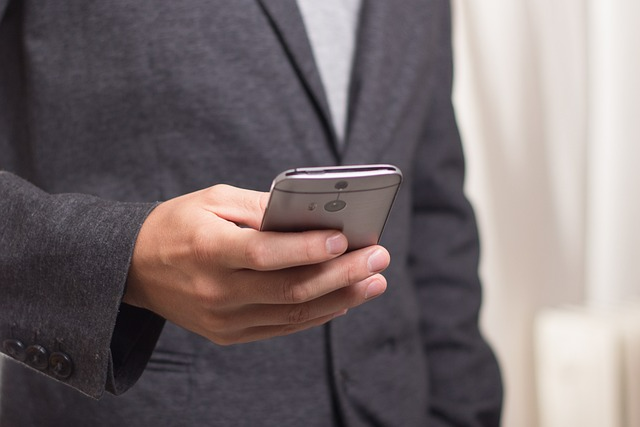

Our stakeholder will be SyriaTel, a telecom business. The purpose of this project is to provide SyriaTel with information that can be used to help in reducing how much money is lost because of customers who don't stick around very long. The project will involve building a classifier to predict a customer will stop doing business with the company soon.

## **Business Understanding**

The telecommunications industry is highly competitive, and customer retention is crucial for maintaining revenue and profitability. For SyriaTel, understanding and predicting customer churn—when customers stop using their services—is vital to reducing revenue loss and increasing customer loyalty. By identifying the key factors that lead to customer churn, SyriaTel can take proactive measures to retain at-risk customers, such as offering targeted promotions, improving customer service, or enhancing product offerings. This project aims to build a predictive model that identifies customers likely to churn based on their usage patterns, service plans, and interactions with customer support. The insights gained from this model will enable SyriaTel to develop effective strategies to minimize churn and improve customer satisfaction, ultimately leading to a more stable customer base and improved financial performance.

## **Data Understanding**

### **Exploratory Data Analysis**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

# Ignore warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
file_path = './bigml_59c28831336c6604c800002a.csv'
syriatel_df = pd.read_csv(file_path)


In [5]:
# Display the first few rows of the dataset to understand its structure
syriatel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Checking for Missing Values**

In [6]:
syriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
#Checking for duplicated values
syriatel_df.duplicated().value_counts()

False    3333
Name: count, dtype: int64

The dataset has 3,333 entries and 21 columns. There are no missing or duplicated values in any column.

**Summary Statistics**

In [8]:
summary_stats = syriatel_df.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
        account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.0

**Checking the distribution of the target variable 'Churn'**

In [9]:
syriatel_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
# Examining the distribution of the target variable 'churn' to understand the class balance
churn_distribution = syriatel_df['churn'].value_counts(normalize=True)
print("\nChurn Distribution:\n", churn_distribution)


Churn Distribution:
 churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


There is a 14.5% churn rate. The presence of this class imbalance suggests that the dataset has a significantly higher proportion of non-churned customers compared to churned customers. 

**a. Account Length**

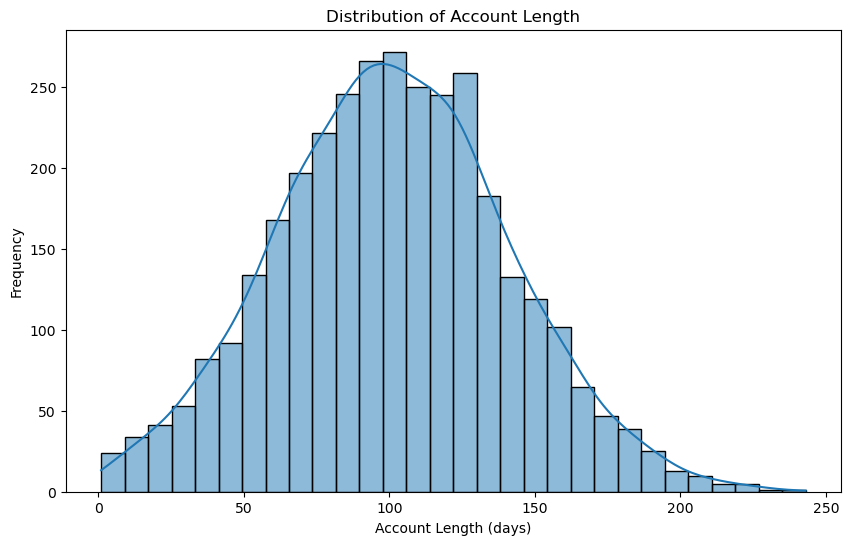

In [11]:
# Plotting a histogram of 'account length' to see the distribution of customer tenure
plt.figure(figsize=(10, 6))
sns.histplot(syriatel_df['account length'], kde=True, bins=30)
plt.title('Distribution of Account Length')
plt.xlabel('Account Length (days)')
plt.ylabel('Frequency')
plt.show()

Customer tenure with SyriaTel varies widely, with some customers having very short account lengths while others have been with the company for a long time. This variation in account length suggests that customer loyalty or the likelihood of churn may be influenced by how long a customer has been with the company.

**b. Total Day Minutes**

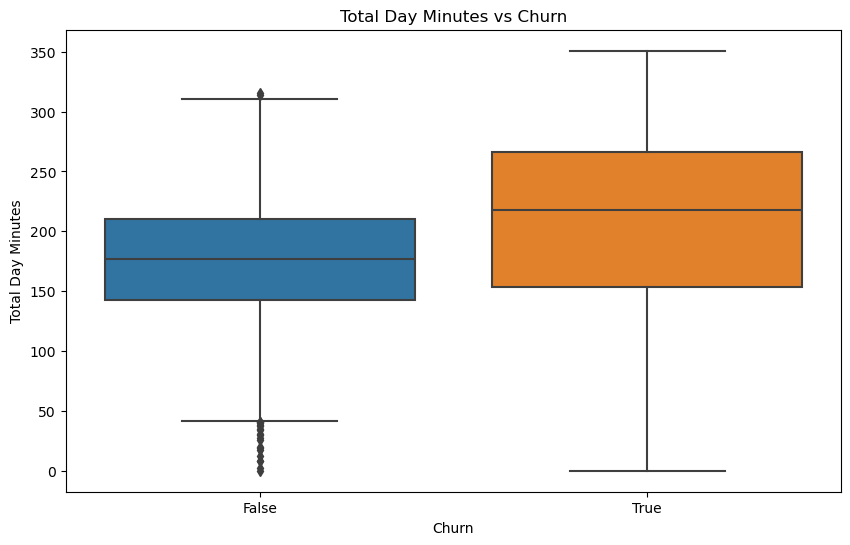

In [12]:
# Visualize the relationship between 'total day minutes' and 'churn'
# Using a boxplot to visualize the relationship between 'total day minutes' and 'churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day minutes', data=syriatel_df)
plt.title('Total Day Minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()


Customers who churn tend to have a wider range of total day minutes, suggesting that higher or more variable usage during the day might be associated with a higher likelihood of churn.

**C. Correlation Heatmap to Identify Potential Relationships Between Features**

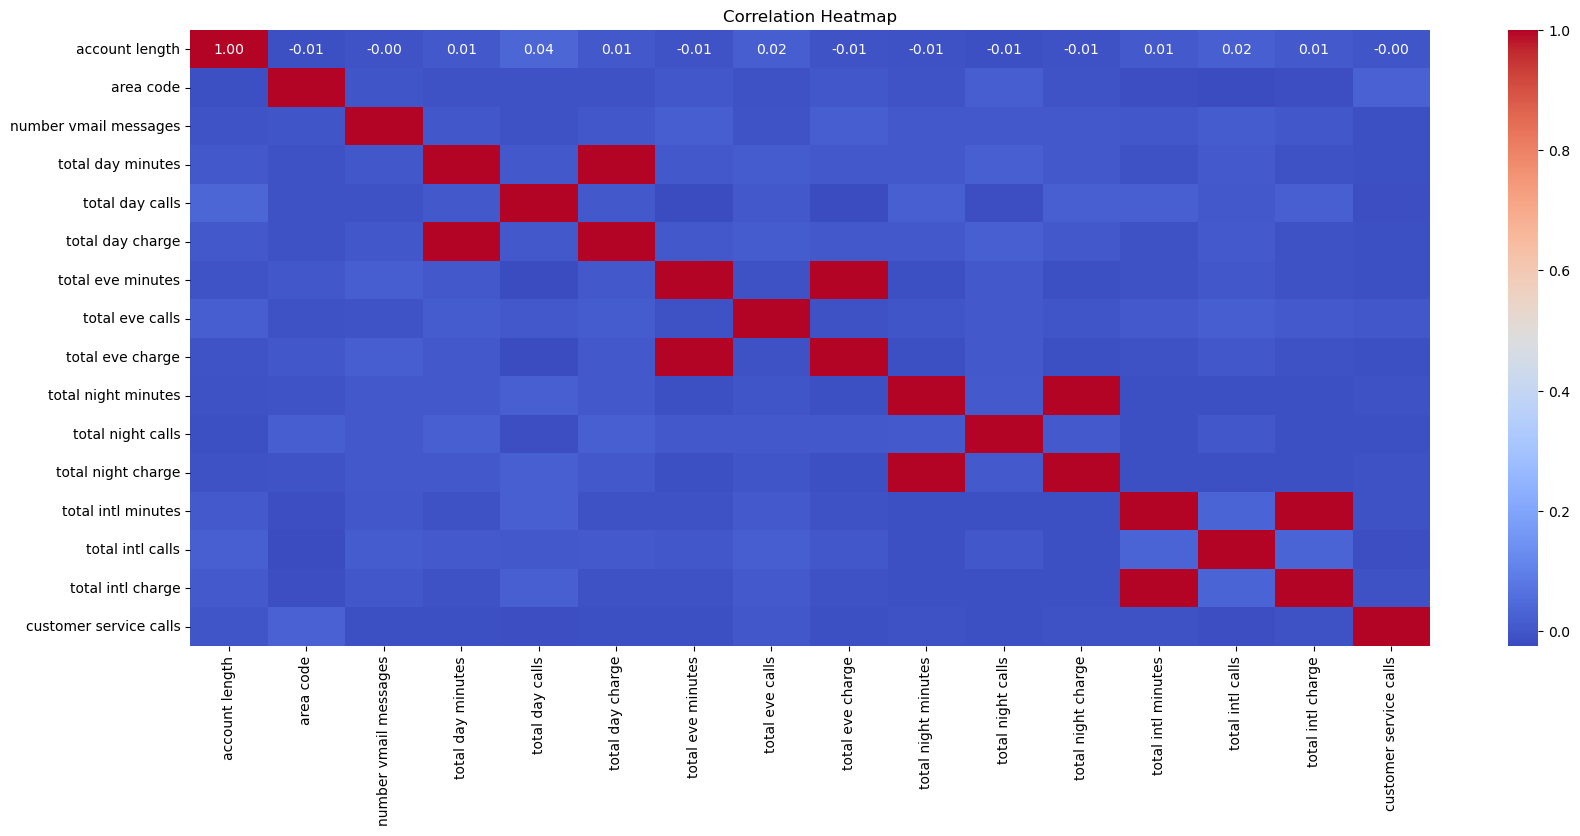

In [13]:
# Exclude non-numeric columns for correlation matrix calculation
numeric_columns = syriatel_df.select_dtypes(include=['float64', 'int64'])

# Plotting a heatmap of the correlation matrix to identify relationships between numerical features
plt.figure(figsize=(20, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals significant correlations between certain features, such as total day minutes and total day charge, total evening minutes and total evening charge, and total international minutes and total international charge, indicating that some features may be highly related and could impact model performance due to multicollinearity.

**d. Separating Numerical and Categorical Columns**

In [14]:
#separating categorical and numerical colums for easier analysis 
numerical_df = syriatel_df[['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
categorical_df = syriatel_df[['state', 'churn', 'international plan', 'voice mail plan']]

**e. Dropping Irrelevant Columns**

In [15]:
new_syriatel_df= syriatel_df.drop(columns= ['phone number', 'account length', 'area code', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'state'], axis=1)
syriatel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
#checking for the shape of the data
new_syriatel_df.shape

(3333, 13)

## **Transforming Categorical Variables**

We will use ohe-hot encoding (OHE) to convert categorical data into a numerical format that machine learning algorithms can use effectively.

In [17]:
# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(new_syriatel_df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
final_df = pd.concat([new_syriatel_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

final_df

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,1.0,0.0,0.0,1.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,1.0,0.0,0.0,1.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,1.0,0.0,1.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,0.0,1.0,1.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False,1.0,0.0,0.0,1.0
3329,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False,1.0,0.0,1.0,0.0
3330,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False,1.0,0.0,1.0,0.0
3331,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False,0.0,1.0,1.0,0.0


In [18]:
#convert churn using label ecoder using a function
def encode(column):
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
#encoding the column 
encode('churn')
#checking for encorded churn column
final_df.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

## **Train Test Split**

This is used to test the data and  to evaluate the performance of the trained model on unseen data. By evaluating the model on the test set, we can get an estimate of how well the model generalizes to new, unseen data.

In [19]:
# Using the standard scaler to standardize the data 
# Split the data into features (X) and target variable (y)
X = final_df.drop(columns='churn', axis=1)
y = final_df['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Data Preprocessing**

#### *Standardization*

We will use standardization to rescale the features of a syritel_df dataset to have zero mean and unit variance. This process helps  to bring all features to a similar scale, which can be beneficial for our machine leanring algorithms that are sensitive to the scale of the input features.

In [20]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### *Using SMOTE to Remove Class Imbalance*

SMOTE helps us to address the class imbalance issue by creating synthetic samples of the minority class to balance the dataset.

In [21]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Modelling and Evaluation**

## **1. Building a Baseline Model**

This is a logistic regression model.

In [22]:
# Buiding a baseline model logistic regression model 

# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred_1 = logreg.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_1)

In [23]:
#creating a function for checking for metrics 
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

In [24]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()
    
    return report

In [25]:
# calling the function to get classifification report values
logreg_report = generate_classification_report(y_test, y_test_pred_1)
logreg_report

,precision,recall,f1-score,support
0,0.939785,0.772085,0.847721,566.000000
1,0.361386,0.722772,0.481848,101.000000
accuracy,0.764618,0.764618,0.764618,0.764618
macro avg,0.650586,0.747429,0.664784,667.000000
weighted avg,0.852201,0.764618,0.792319,667.000000


 - **Precision:** The precision values for class 0 and class 1 are 0.94 and 0.361, respectively. This means that  when it predicts a customer will not churn, it is correct 93.98% of the time, and when the model predicts a customer will churn, it is correct only 36.14% of the time. A higher precision indicates that the model has a low rate of false positives for that class. Class 0 has a higher precision than class 1, suggesting that the model is better at predicting class 0 than class 1.

 - **Recall:** The recall values for class 0 and class 1 are 0.777 and 0.722, respectively, indicating that the model correctly identifies 77.21% of the non-churned customers (0), and 72.28% of the churned customers (1). Recall represents the model's ability to correctly identify positive instances. Similar to precision, class 0 has a higher recall than class 1. This suggests the model is relatively good at identifying actual churners.

 - **F1-Score:** The F1-scores for class 0 and class 1 are 0.848 and 0.482, respectively. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class 0 has a higher F1-score than class 1.

 - **Accuracy:** The accuracy of the model is 0.765, which indicates the proportion of correctly predicted instances out of the total number of instances.

 - Hence logistic regression has 76.5% prediction accuracy of test data.

 - Based on these metrics, it appears that the model performs relatively better for class 0 compared to class 1.

{'roc_auc_train': 0.7596322241681261,
 'roc_auc_test': 0.7474285414407164,
 'accuracy_train': 0.7596322241681261,
 'accuracy_test': 0.7646176911544228,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x19817d38450>}

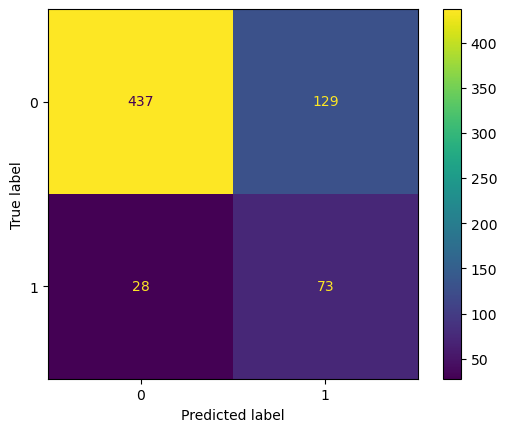

In [26]:
# Checking the metric of the baseline model and drawing a confusion matrix using above function 
evaluate_model_metrics(logreg, X_train_resampled,y_train_resampled, X_test, y_test)

 - From the above results, it can be seen that the logistic regression model has an ROC AUC value of 0.7596 on the training data and 0.7474 on the testing data. This indicates that the model has a relatively similar level of discrimination between classes on both the training and testing datasets, with only a slight drop in performance on the test data.

  - Confusion matrix is used to display the predicted and true labels of logistic regression model where the True positives `73`, False negative `28`, True Negative `437` and False positive `129`.

   - In summary, the model achieves a training accuracy of approximately 75.96% and a testing accuracy of around 76.46%. This indicates that the model performs consistently on both the training and testing datasets, with no significant signs of overfitting. However, the relatively modest accuracy and ROC AUC scores suggest that there is room for improvement.

## **2. Cross Validation Score to Improve Model Performance**

In [27]:
# Create an instance of Logistic Regression with cross-validation
logreg_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_final.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.7602889667250436,
 'roc_auc_test': 0.7375275513417066,
 'accuracy_train': 0.7602889667250438,
 'accuracy_test': 0.7616191904047976,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x19817c8ef10>}

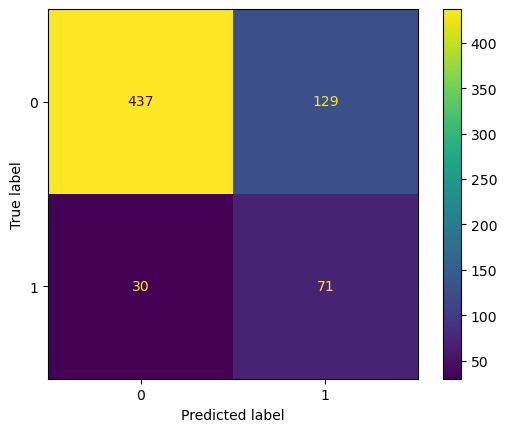

In [28]:
evaluate_model_metrics(logreg_final,X_train_resampled,y_train_resampled,X_test,y_test)

## **3. Hyperparameter Tuning Using GridSearchCV**

In [29]:
logreg_two = LogisticRegression(solver='liblinear')

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']        # Regularization type
}

# Setup the GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Evaluate the tuned model on the test data
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Calculate and print metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Test Accuracy: {accuracy_test}")
print(f"Test ROC AUC: {roc_auc_test}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1'}
Test Accuracy: 0.7646176911544228
Test ROC AUC: 0.8208550537032502
Confusion Matrix:
 [[436 130]
 [ 27  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85       566
           1       0.36      0.73      0.49       101

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.67       667
weighted avg       0.85      0.76      0.79       667



After hyperparameter tuning:

 - It can be seen that after using cross-validation and picking 5 folds, we achieved an improved model with an accuracy of 0.7646, representing a 76.46% accuracy level in predicting customer churn in the test data. The ROC AUC score for the test data is 0.8208, indicating a strong ability to distinguish between the two classes.

 - The adjusted model demonstrates a reasonable level of performance, correctly predicting the class labels for the majority of instances in both the training and testing datasets. The model shows a substantial improvement in ROC AUC, particularly in its ability to discriminate between churners and non-churners.

  - The testing accuracy is consistent with the initial model, but the ROC AUC has improved, suggesting that the model is better at ranking positive instances higher than negative ones. The precision for class 0 (non-churn) remains high at 0.94, while the recall for class 1 (churn) has improved to 0.73, indicating a better ability to identify actual churners.

 - Therefore, from these results, we can observe that the hyperparameter-tuned logistic regression model has made notable improvements, especially in terms of ROC AUC and recall for the minority class (churners). 

## **4. Building Decison Trees Classifier Model**

In [30]:
# Create an instance of DecisionTreeClassifier with regularization parameters
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Fit the model on the training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred_2= dt_clf.predict(X_train_resampled)
y_test_pred_2 = dt_clf.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_2)

{'roc_auc_train': 0.8918563922942206,
 'roc_auc_test': 0.8797886855823391,
 'accuracy_train': 0.8918563922942206,
 'accuracy_test': 0.9340329835082459,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x19817da5ed0>}

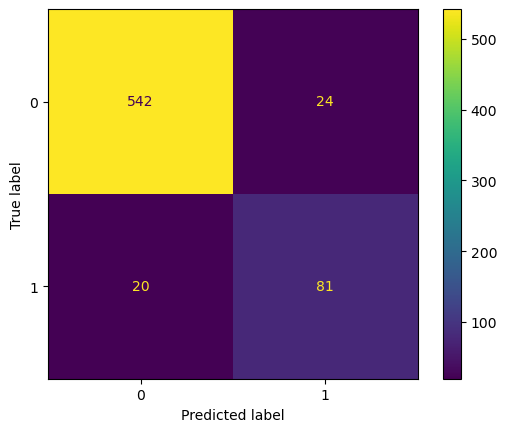

In [31]:
# Checking for decison tree metrics using the pre-defiend function 
evaluate_model_metrics(dt_clf, X_train_resampled, y_train_resampled, X_test, y_test)

 - `roc_auc_train:` It measures the model's ability to distinguish between the two classes (positive and negative) in the training data. A value of 0.892 indicates that the model performs very well in classifying the training instances, with a high ability to differentiate between churners and non-churners.

 - `roc_auc_test:` It measures the model's ability to generalize its predictions to unseen data. A value of 0.880 suggests that the model maintains a strong level of performance on the testing data, indicating that it generalizes well and is not overfitting.

 - `accuracy_train:` It represents the proportion of correctly classified instances in the training set. A value of 0.892 indicates that the model achieves a high level of accuracy on the training data, showing that it has learned the patterns in the training set effectively.

 - `accuracy_test:` A value of 0.934 suggests that the model performs exceptionally well on the testing data, indicating that it generalizes well and is not overfitting. The model's ability to maintain such a high accuracy on unseen data highlights its robustness.

 - `Confusion Matrix:` From the confusion matrix, it can be seen that the model correctly classified 81 instances as true positives (TP), 542 as true negatives (TN), while there were 24 false positives (FP) and 20 false negatives (FN). This reflects improved prediction capability, particularly in reducing misclassifications.

 - `Further Insights:` To gain deeper insights into the performance of the Decision Tree classifier, it is recommended to review the classification report, which provides a detailed analysis of precision, recall, and F1-score for each class.

In [32]:
#using predefined function to check for classification report
dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
dt_clf_report

,precision,recall,f1-score,support
0,0.964413,0.957597,0.960993,566.000000
1,0.771429,0.801980,0.786408,101.000000
accuracy,0.934033,0.934033,0.934033,0.934033
macro avg,0.867921,0.879789,0.873700,667.000000
weighted avg,0.935190,0.934033,0.934556,667.000000


 - `Precision:` In class 0, the precision is 0.964, indicating that 96.% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.771, meaning that 77.1% of the instances predicted as class 1 are true positives.

 - `Recall:` In class 0, the recall is 0.958, indicating that 95.8% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.802, meaning that 90.2% of the actual class 1 instances are correctly identified as true positives.

  - `F1-score:` In class 0, the F1-score is 0.961, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.786, suggesting a slightly lower balance between precision and recall for class 1.

 - `Accuracy:` Accuracy is the overall proportion of correctly classified instances. In this case, the accuracy is 0.934, meaning that the model correctly predicts the class labels for 93.4% of the instances.



## **5. Building a Random Forest Model**

In [33]:
# Create a random forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features='sqrt', random_state=42)

# Fit the model on the selected training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing sets
y_train_pred_3 = rf_classifier.predict(X_train_resampled)
y_test_pred_3 = rf_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_3)

{'roc_auc_train': 0.871278458844133,
 'roc_auc_test': 0.8159832767729069,
 'accuracy_train': 0.8712784588441331,
 'accuracy_test': 0.8740629685157422,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x198194a6450>}

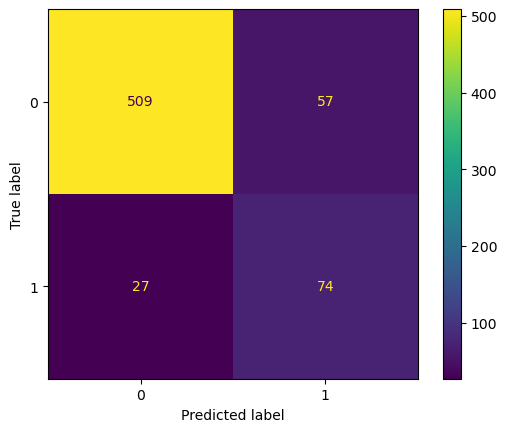

In [34]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(rf_classifier, X_train_resampled, y_train_resampled, X_test, y_test)

 - The andom Forest classifier achieves an accuracy of approximately 87.1% on the training data and 87.4% on the testing data. It shows good performance in distinguishing between the positive and negative classes, with an area under the ROC curve (AUC) of 0.87 on the training data and 0.82 on the testing data. Overall, the model performs well and demonstrates a high level of accuracy in predicting the target variable.
 - The confusion matrix TP is 74, TN is 509, FP is 57 and FN is 27.


In [35]:

generate_classification_report(y_test, y_test_pred_3)

,precision,recall,f1-score,support
0,0.949627,0.899293,0.923775,566.000000
1,0.564885,0.732673,0.637931,101.000000
accuracy,0.874063,0.874063,0.874063,0.874063
macro avg,0.757256,0.815983,0.780853,667.000000
weighted avg,0.891368,0.874063,0.880491,667.000000


 - `Precision:` In class 0, the precision is 0.95, indicating that 9.% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.565, meaning that 56.5% of the instances predicted as class 1 are true positives.

 - `Recall:` In class 0, the recall is 0.9, indicating that 90% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.733, meaning that 73.3% of the actual class 1 instances are correctly identified as true positives.

  - `F1-score:` In class 0, the F1-score is 0.924, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.638, suggesting a slightly lower balance between precision and recall for class 1.

 - `Accuracy:` Accuracy is the overall proportion of correctly classified instances. In this case, the accuracy is 0.874, meaning that the model correctly predicts the class labels for 87.4% of the instances.

## **Summary**

 - Based on the three models it can be seen that logistic regression perfoms poorly in making predictions of customer churn.
 - The random forest clasifier and decision tree models perform pretty well with 87.4% and 93.4%, resectively.
 - Hence, it is relevant to improve the random forest clasifier and decision tree models due to their higher predictability using hyperparatemeters to achieve the best accuracy.
 - Hyperparameter is a recommended tool for increasing efficiency and perfomance of models.

# **Hyperparameter Tuning**

### **1. Improving the Randpm Forest Model**

In [36]:
# Create an instance of the Random Forest classifier
rf = RandomForestClassifier( random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the training data
y_train_pred = best_model.predict(X_train_resampled)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Compute the accuracy
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.9352014010507881,
 'roc_auc_test': 0.8541528181086661,
 'accuracy_train': 0.9352014010507881,
 'accuracy_test': 0.9250374812593704,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1981959bed0>}

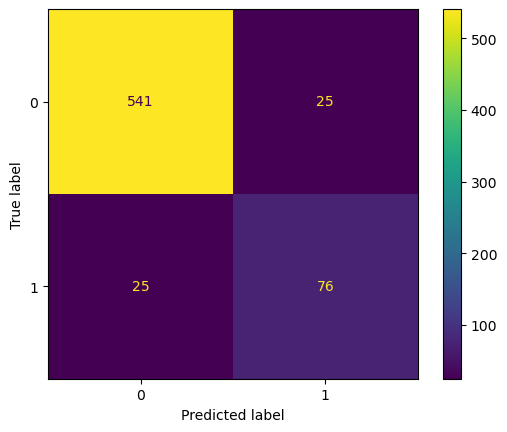

In [37]:
#using the function above the draw confusion matrix 
evaluate_model_metrics(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

After tuning the parameters for the random forest classifier using grid search our model improved on its perfomance as explained below:

 - The accuracy of the random forest model is now at 92.5%,  which indicates that the model correctly predicted the class labels for the test data with an accuracy of approximately 93.5% and predicted train test with 85.4%. hence perfect for predicting customer churn.
 - The confusion matrix in tuned parameter represents TP as 76, TN as 541, FP as 25 and FN 25 which is best in making prediction.

## **Using ROC Curve to Check the Best Model

In [38]:
logreg_two.fit(X_train, y_train)
logreg_final.fit(X_train, y_train)
best_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=5, random_state=42)

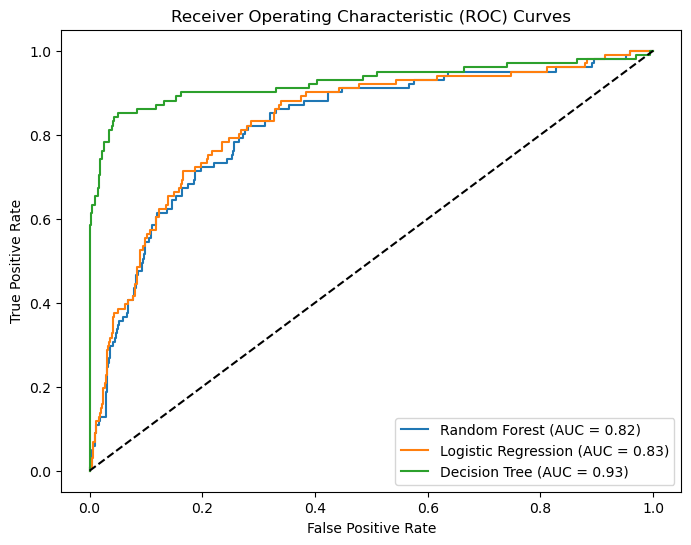

In [39]:
#drawing ROC curve for the above three models 

# Compute ROC curves and AUC scores for each model
models = [logreg_two, logreg_final, best_model]
labels = ['Random Forest', 'Logistic Regression', 'Decision Tree']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

Based on the AUC curves shown above, we can deduce the following:

 - **Decision Tree has an AUC of 0.93:** This indicates that the Decision Tree model has excellent discriminatory power and is highly effective at distinguishing between the positive (churn) and negative (non-churn) classes. It achieves a high true positive rate (TPR) while maintaining a low false positive rate (FPR), resulting in a larger area under the ROC curve.

 - **Random Forest has an AUC of 0.82:** The Random Forest model performs well but slightly lower than the Decision Tree classifier. It has a good ability to classify the two classes correctly, but it may have slightly higher false positive and false negative rates compared to the Decision Tree.

 - **Logistic Regression has an AUC of 0.83:** The Logistic Regression model performs almost on par with the Random Forest model in terms of discrimination. However, it still falls behind the Decision Tree model in its ability to correctly classify positive and negative instances, leading to a smaller area under the ROC curve.

 - **Comparison**: The Decision Tree has the largest area under the ROC curve, followed by the Logistic Regression and Random Forest, indicating that the Decision Tree has the best overall discriminatory power and performs better in distinguishing between the positive and negative classes.

 - Hence, the Decision Tree Classifier appears to be the best model for SyriaTel, as it has the largest area under the curve (AUC) and also shows the highest accuracy in predicting customer churn.

**Conclusion**

Using the best model, which is the **Decision Tree**, SyriaTel company will be able to achieve a lot by:

 - **Accurate Customer Churn Prediction:** The high AUC value of 0.92 indicates that the Decision Tree model is highly effective in identifying customers who are likely to churn. This is crucial for SyriaTel as it allows them to take proactive measures to retain at-risk customers, potentially reducing customer attrition and its associated costs.

 - **Cost Savings:** By accurately predicting customer churn, SyriaTel can focus its resources on targeted retention strategies, such as personalized offers, loyalty programs, or enhanced customer service, specifically for customers identified as at risk. This targeted approach can lead to significant cost savings compared to deploying retention efforts across the entire customer base.

 - **Customer Retention:** The strong predictive capability of the Decision Tree model enables SyriaTel to implement timely interventions to retain valuable customers. By addressing concerns and offering incentives before customers decide to leave, SyriaTel can maintain a loyal customer base, thereby increasing customer satisfaction and loyalty.

 - **Business Strategy and Decision-Making:** Accurate churn prediction provides valuable insights into customer behavior and the factors that contribute to churn. This information empowers SyriaTel to make data-driven decisions, such as improving products or services, enhancing customer experiences, or launching targeted marketing campaigns. These strategies aim to reduce churn and boost customer retention, ultimately supporting the company's long-term business objectives.